## Data Cleaning
We prepared the dataset for analysis by parsing dates, setting the index, removing duplicates, and filling or correcting missing values in price and volume data.

**1. Load and preprocess dataset**  

Imported Pandas and NumPy, loaded the CSV file, parsed the 'Date' column into datetime format, set it as the index, sorted chronologically, and dropped duplicate entries to ensure data integrity.

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv("/workspaces/python-for-finance-bobby-zlatarov/DASH.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.set_index("Date").sort_index().drop_duplicates()

df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


**2. Add previous close and fill missing 'Open' and 'Close' values**  

Used `.shift(1)` to create a 'Prev_Close' column, then filled missing 'Open' prices using the previous close. Missing 'Close' values were forward-filled using `.ffill()`.

In [57]:
df["Prev_Close"] = df["Close"].shift(1)
df["Open"] = df["Open"].fillna(df["Prev_Close"])
df["Close"] = df["Close"].ffill()

df

,Close,High,Low,Open,Volume,Prev_Close
Date,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN,189.509995
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,186.000000
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,175.000000
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,160.000000
...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,218.449997
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,217.490005
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,214.970001


**3. Fill missing 'High' and 'Low' prices using monthly averages** 
 
Grouped by month and filled missing 'High' and 'Low' values with the monthly mean to preserve realistic price ranges without forward-filling from unrelated periods.

In [59]:
df["High"] = df["High"].fillna(df.groupby(df.index.to_period("M"))["High"].transform("mean"))
df["Low"] = df["Low"].fillna(df.groupby(df.index.to_period("M"))["Low"].transform("mean"))

df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


**4. Handle missing 'Volume' values**  

Set 'Volume' to 0 if it was missing **and** the stock didn't move (Open = Close). For all other missing volume entries, replaced with the median volume.

In [60]:
df.loc[df["Volume"].isna() & (df["Close"] == df["Open"]), "Volume"] = 0

vol_median = df["Volume"].median()
mask = df["Volume"].isna() & (df["Close"] != df["Open"])
df.loc[mask, "Volume"] = vol_median

df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


## Feature Engineering

**1. Simple Day Returns**  

Calculated daily percentage changes using `.pct_change()` on closing prices. This captures short-term price movements and is a basic input for return-based financial analysis.

In [34]:
df["Simple_Return"] = df.Close.pct_change()

**2. Logarithmic Returns**  

Computed log returns with `np.log(Close / Prev_Close)`. These are time-additive and better suited for statistical models and long-term performance evaluation than simple returns.



In [35]:
df["Log_Return"] = np.log(df["Close"] / df["Prev_Close"])

**3. 20-Day Momentum**  

Used `.shift(20)` to compare today’s price to that of 20 trading days ago. Captures medium-term momentum and helps assess trend strength over recent periods.

In [36]:
df["20D_Momentum"] = df["Close"] - df["Close"].shift(20)

**4. 20-Day Simple Moving Average**
  
Applied `.rolling(window=20).mean()` to smooth out noise in daily prices. This trend-following indicator highlights the direction and persistence of recent price movements.

In [37]:
df["20D_SMA"] = df["Close"].rolling(window=20).mean()

**5. 20-Day Rolling Volatility**  

Calculated the standard deviation of daily returns in a 20-day window to quantify recent price volatility, which is commonly used to assess risk and market uncertainty.

In [38]:
df["Dev"] = df["Simple_Return"].rolling(window=20).std()

**6. Day of the Week**  

Extracted the weekday from the index using `.day_name()` to explore systematic patterns in returns across different weekdays, such as the Monday or Friday effect.

In [39]:
df["Day_of_Week"] = df.index.day_name()

**7. Price Surge Identification**  

Identified large price movements by flagging daily returns exceeding 4 standard deviations above the mean. This helps detect unusual spikes possibly linked to news or market events.

In [40]:
mean_return = df["Simple_Return"].mean()
std_return = df["Simple_Return"].std()
df["Price_Surge"] = df["Simple_Return"] > (mean_return + 4 * std_return)

**8. Volume Spike Identification**  

Flagged unusual trading activity by marking days when volume exceeds the mean by more than 6 standard deviations, which often signals abnormal investor behavior or significant events.

In [41]:
mean_volume = df["Volume"].mean()
std_volume = df["Volume"].std()
df["Volume_Spike"] = df["Volume"] > (mean_volume + 6 * std_volume)

**9. Bollinger Bands Calculation**  

Computed Bollinger Bands using the 20-day SMA and rolling volatility. These define a volatility-based range to help spot overbought or oversold conditions in the price.

In [42]:
df["Upper_BB"] = df["20D_SMA"] + 2 * df["Dev"]
df["Lower_BB"] = df["20D_SMA"] - 2 * df["Dev"]

df

,Close,High,Low,Open,Volume,Prev_Close,Simple_Return,Log_Return,20D_Momentum,20D_SMA,Dev,Day_of_Week,Price_Surge,Volume_Spike,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,False,False,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,189.509995,-0.018521,-0.018695,NaN,NaN,NaN,Thursday,False,False,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,186.000000,-0.059140,-0.060961,NaN,NaN,NaN,Friday,False,False,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,175.000000,-0.085714,-0.089612,NaN,NaN,NaN,Monday,False,False,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,160.000000,-0.006938,-0.006962,NaN,NaN,NaN,Tuesday,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,218.449997,-0.004395,-0.004404,33.970001,206.409998,0.017753,Monday,False,False,206.445504,206.374493
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,217.490005,-0.011587,-0.011654,22.869995,207.553498,0.015859,Tuesday,False,False,207.585216,207.521780
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,214.970001,0.013165,0.013079,20.000000,208.553498,0.014953,Wednesday,False,False,208.583403,208.523593


# Key Dates and Metrics

**1. Highest Rolling Volatility dates**

To identify the date and the value of the highest rolling volatility in each year, we are using the `groupby` function to group the data by the different years for which we also need the `to_period` function.

`df.dropna(subset=["Dev"])`:
Removes rows where the "Dev" (volatility) column is NaN, preventing errors and ensuring only valid data is considered for the maximum search.

`df.index.to_period("Y")`:
Converts the datetime index to a yearly period, so groupby groups by year.

`df.groupby(...["Dev"].idxmax()`:
For each year group, finds the index (date) where "Dev" is the maximum.

`df.loc[...,"Dev"]`:
Selects the rows at those dates and returns the "Dev" value for each year's maximum.


In [43]:
df = df.dropna(subset=["Dev"])

df.loc[df.groupby(df.index.to_period("Y"))["Dev"].idxmax(), "Dev"]

Date
2021-05-20    0.067393
2022-06-01    0.080994
2023-11-06    0.047470
2024-02-27    0.033547
2025-04-10    0.048324
Name: Dev, dtype: float64

**2. Largest Price Surge day**

`df.index.to_period("Y")` converts the datetime index to yearly periods.
This means each group contains all the rows (days) that belong to the same year.

For each year, it finds the index (date) where `Simple_Return` is the highest.
`idxmax()` returns the index label (the date) where the max value occurs within each group/year.

`df.loc[ ... , "Simple_Return"]` selects the rows in df where the index matches the dates found above, and returns only the `Simple_Return` for those rows.

In [44]:
df.loc[df.groupby(df.index.to_period("Y"))["Simple_Return"].idxmax(), "Simple_Return"]

Date
2021-05-14    0.221491
2022-03-16    0.134512
2023-11-02    0.156653
2024-08-02    0.083457
2025-04-09    0.137738
Name: Simple_Return, dtype: float64

**3. Largest Price Drop Day**

`df.groupby(df.index.to_period("Y"))`: Groups the data by year

`["Simple_Return"].idxmin()`: For each year, finds the date where `Simple_Return` is the lowest (most negative)

We use `idxmin()` instead of `idxmax()` because we want the largest price drop (most negative return)

In [ ]:

df.loc[df.groupby(df.index.to_period("Y"))["Simple_Return"].idxmin(), "Simple_Return"]

Date
2021-02-22   -0.135457
2022-05-11   -0.131621
2023-02-17   -0.075946
2024-05-02   -0.103170
2025-04-03   -0.080634
Name: Simple_Return, dtype: float64

**4. Highest Volume Day**

`df.groupby(df.index.to_period("Y"))`: Groups the data by year

`["Volume"].idxmax()`: For each year, finds the date where Volume is the highest

In [46]:

df.loc[df.groupby(df.index.to_period("Y"))["Volume"].idxmax(), "Volume"]

Date
2021-03-09    20400000.0
2022-02-17    47405700.0
2023-12-15    30556000.0
2024-05-02    22134800.0
2025-03-21    73637400.0
Name: Volume, dtype: float64

**5. Highest High and Lowest Low**

`groupby(...)[“High”].idxmax()` finds, for each year, the index (i.e., date) where the “High” column is the highest.

`df.loc[ ... , ["High"]]` selects those rows and the “High” column, giving a DataFrame with the date as the index and the highest high value for each year.

`highs['High_Date'] = highs.index.strftime('%Y-%m-%d')` adds a column with the date (as a string) of each high.

Similar to above, but with `idxmin()` to find the date of the minimum (lowest) value in the “Low” column.



In [47]:
yearly_highs = df.groupby(df.index.to_period('Y'))['High'].idxmax()
yearly_lows = df.groupby(df.index.to_period('Y'))['Low'].idxmin()

highs = df.loc[yearly_highs, ['High']]
highs['High_Date'] = highs.index.strftime('%Y-%m-%d')

lows = df.loc[yearly_lows, ['Low']]
lows['Low_Date'] = lows.index.strftime('%Y-%m-%d')

result = pd.DataFrame({
    'High_Date': highs['High_Date'].values,
    'High': highs['High'].values,
    'Low_Date': lows['Low_Date'].values,
    'Low': lows['Low'].values
}, index=highs.index.to_period('Y'))

result.index.name = 'Year'

result = result[['High_Date', 'High', 'Low_Date', 'Low']]

print(result)


       High_Date        High    Low_Date         Low
Year                                                
2021  2021-11-15  257.250000  2021-05-13  110.129997
2022  2022-01-12  152.494995  2022-10-24   41.365002
2023  2023-12-11  103.980003  2023-01-06   45.931999
2024  2024-12-17  181.779999  2024-01-04   93.330002
2025  2025-06-06  220.880005  2025-04-07  155.399994


**6. Annual Open and Close**

`Open_Date=('Open', lambda x: x.index[0])`:
For the "Open" column, get the index (date) of the first value in each year (i.e., when the year’s opening price occurred).

`Open=('Open', 'first')`:
The opening price at the start of each year (same as before).

`Close_Date=('Close', lambda x: x.index[-1])`:
For the "Close" column, get the index (date) of the last value in each year (i.e., when the year’s closing price occurred).

`Close=('Close', 'last')`:
The closing price at the end of each year (same as before).

`lambda x` functions on the index will capture the specific dates associated with the prices

In [48]:
df.groupby(df.index.to_period('Y')).agg({"Open" : "first", "Close" : "last"})

df.groupby(df.index.to_period('Y')).agg(
    Open_Date=('Open', lambda x: x.index[0]),   
    Open=('Open', 'first'),                      
    Close_Date=('Close', lambda x: x.index[-1]),  
    Close=('Close', 'last')                      
)

,Open_Date,Open,Close_Date,Close
Date,,,,
2021,2021-01-08,152.000000,2021-12-31,148.899994
2022,2022-01-03,149.610001,2022-12-30,48.820000
2023,2023-01-03,49.980000,2023-12-29,98.889999
2024,2024-01-02,97.800003,2024-12-31,167.750000
2025,2025-01-02,168.789993,2025-06-13,218.119995


# Data Visualization 

**1. Close Prices, SMA and Bollinger Bands Plot**

Plotting the close prices along with the simple moving average line and Bollinger Bands.

/tmp/ipykernel_2972/1002525596.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


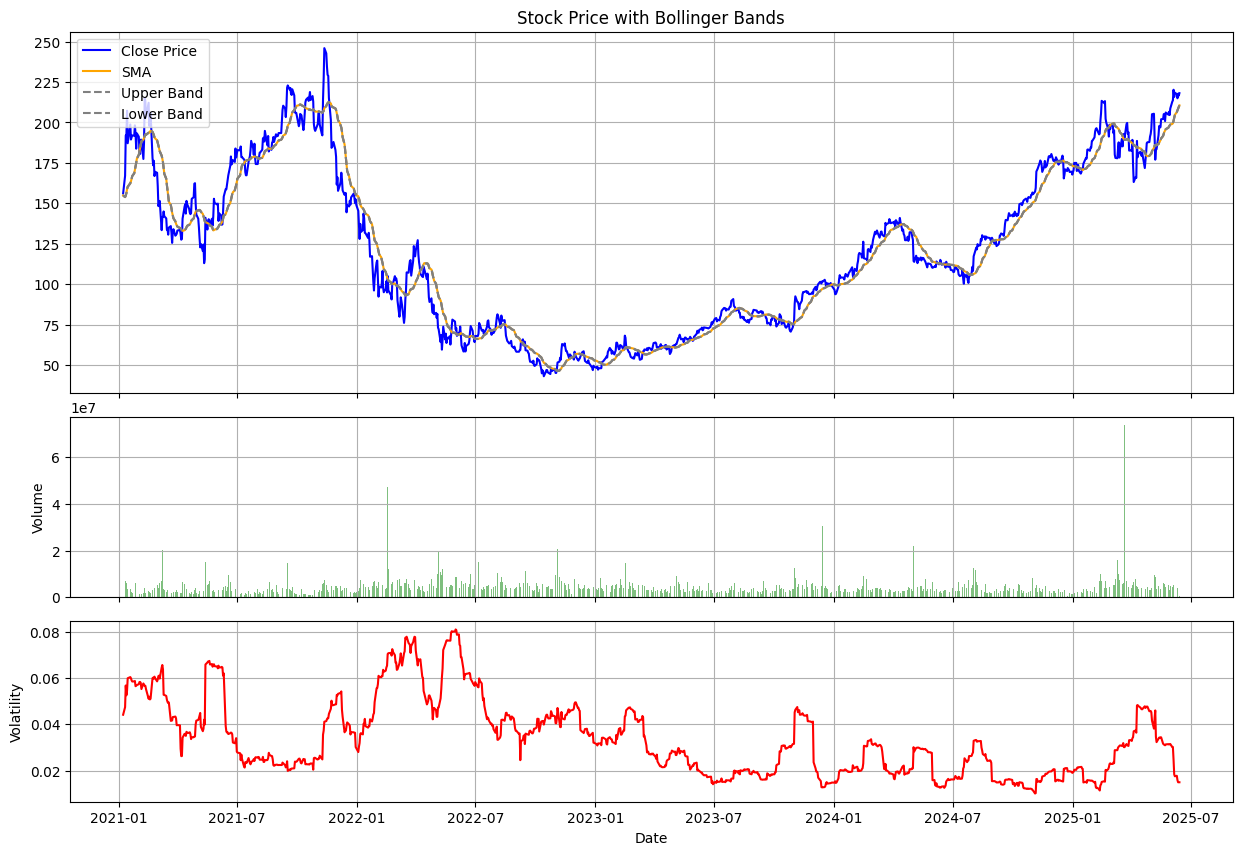

In [49]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

def plot_stock_analysis(df):
    fig, (ax1, ax2, ax3) = plt.subplots(
        nrows=3,
        ncols=1,
        figsize=(15, 10),
        sharex=True,       # This makes all x-axes the same (dates aligned)
        gridspec_kw={'height_ratios': [2, 1, 1], 'hspace': 0.1}
    )

    # Main price plot with Bollinger Bands and SMA
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
    ax1.plot(df.index, df['20D_SMA'], label='SMA', color='orange')
    ax1.plot(df.index, df['Upper_BB'], label='Upper Band', color='gray', linestyle='--')
    ax1.plot(df.index, df['Lower_BB'], label='Lower Band', color='gray', linestyle='--')
    ax1.fill_between(df.index, df['Upper_BB'], df['Lower_BB'], alpha=0.1)
    ax1.set_title('Stock Price with Bollinger Bands')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Volume subplot
    ax2.bar(df.index, df['Volume'], color='green', alpha=0.5)
    ax2.set_ylabel('Volume')
    ax2.grid(True)

    # Volatility subplot
    ax3.plot(df.index, df['Dev'], color='red')
    ax3.set_ylabel('Volatility')
    ax3.set_xlabel('Date')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

plot_stock_analysis(df)

**2. Histograms of Log Returns**

Plot a histogram of log returns

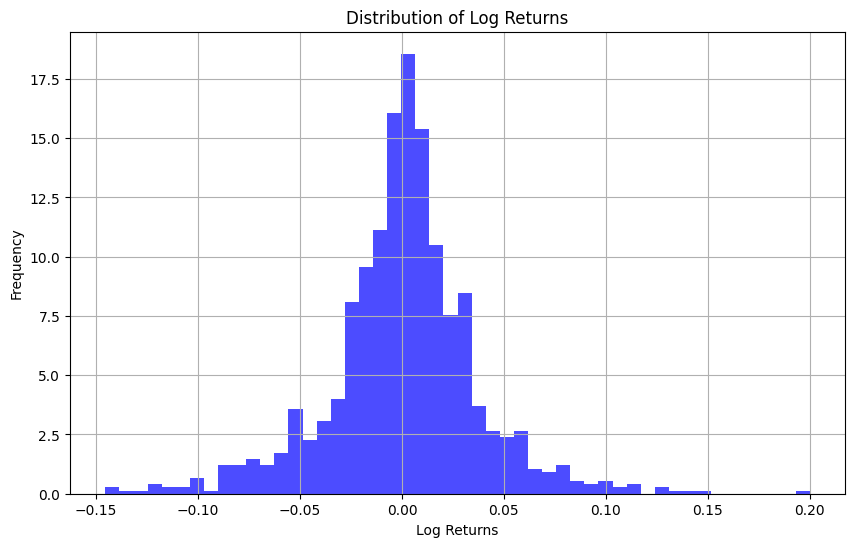

In [50]:
def plot_returns_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Log_Return'].dropna(), bins=50, density=True, alpha=0.7, color='blue')
    plt.title('Distribution of Log Returns')
    plt.xlabel('Log Returns')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_returns_histogram(df)

**3. Scatter Plot between Volume and Daily Returns**

Construct a scatter plot to explore the relationship between volume and daily returns.

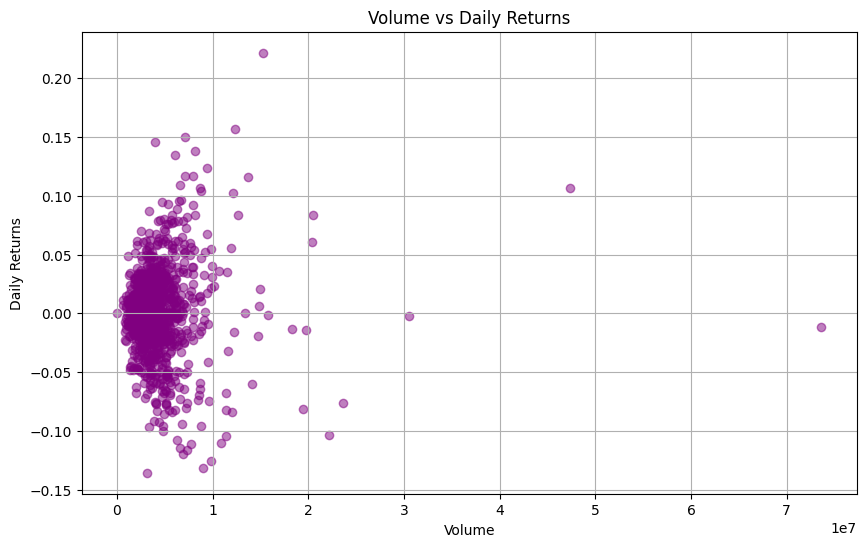

In [51]:
def plot_volume_returns_scatter(df):
    plt.figure(figsize=(10, 6))
    returns = df['Close'].pct_change()
    plt.scatter(df['Volume'], returns, alpha=0.5, color='purple')
    plt.title('Volume vs Daily Returns')
    plt.xlabel('Volume')
    plt.ylabel('Daily Returns')
    plt.grid(True)
    plt.show()

plot_volume_returns_scatter(df)

# Reporting